In the paper [Extreme submillimetre starburst galaxies](https://arxiv.org/abs/1704.07783) there are claims made about there being galaxies with an SFR of 30,000 $M_{\odot}/yr$. We believe these objects are actually due to blending of multiple objects. 

This notebook wil work on establishing the sample of objects we will examine in this paper.

Things to do:
1. Establish the file associated with Michael's paper
2. Gather all the relevant maps, psf's etc
3. Visualise Sources

In [8]:
from astropy.table import Table
#Set some color info
import seaborn as sns
import pylab as plt
%matplotlib inline
cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
vmin=-0.01
vmax=0.1

In [9]:
ysb=Table.read('./data/MRRfiles/fromPaper.txt', format='ascii')

(array([ 14.,   5.,   4.,   3.,   1.,   4.,   1.,   0.,   0.,   1.]),
 array([  5011.87233627,   6170.27201008,   7328.67168389,   8487.0713577 ,
          9645.47103151,  10803.87070532,  11962.27037913,  13120.67005294,
         14279.06972676,  15437.46940057,  16595.86907438]),
 <a list of 10 Patch objects>)

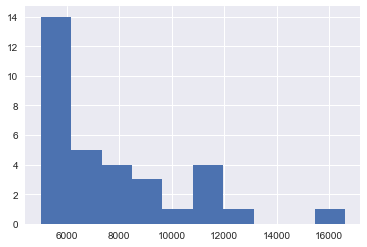

In [10]:
import numpy as np
plt.hist(np.power(10.0,ysb['sfr']))

In [18]:
ysb

RA,dec,i,S24,S250,S350,S500,zphot,type,2,nbands,zsubm,zcomb,sfr
float64,float64,float64,float64,float64,float64,float64,float64,str3,float64,int64,float64,float64,float64
159.03456,58.44533,21.37,1127.8,131.6,84.2,42.2,1.44,Scd,4.8,4,1.16,1.19,3.79
162.26817,58.46461,22.33,504.1,85.4,78.7,62.8,3.15,Sbc,5.0,6,3.16,3.17,3.87
160.33716,59.40493,22.36,1225.7,0.0,36.8,39.0,3.29,Scd,6.7,6,4.93,3.27,3.72
160.50839,58.67179,23.49,904.6,95.7,79.5,60.5,3.81,Sab,4.1,6,2.86,3.07,4.0
161.98271,58.07477,22.1,264.4,44.2,45.3,33.6,4.13,sb,25.4,6,3.15,3.68,3.76
162.33324,58.10657,22.61,516.4,56.9,52.9,59.6,2.8,Scd,6.1,8,4.09,2.89,3.73
160.9194,57.91475,22.32,682.3,116.5,102.0,65.4,3.06,Sab,20.5,6,2.56,2.8,4.05
161.21138,58.11261,23.29,560.2,148.6,116.4,54.2,3.33,Sbc,26.8,5,2.02,1.75,3.7
160.16505,57.27072,23.12,625.2,52.7,52.4,44.8,3.7,Sab,31.2,4,3.45,3.68,3.81


The `ysb` table contains all the galaxies in Lockman-SWIRE that are in the 2017 paper.

In [ ]:
def MRR_sample(ra,dec,radius):
    sns.set_style("white")
    SPIRE=[]
    fig = plt.figure(figsize=(30,10))
    SPIRE.append(aplpy.FITSFigure(hdulist_250[1],figure=fig,subplot=(1,3,1)))
    SPIRE.append(aplpy.FITSFigure(hdulist_350[1],figure=fig,subplot=(1,3,2)))
    SPIRE.append(aplpy.FITSFigure(hdulist_500[1],figure=fig,subplot=(1,3,3)))
    for i in SPIRE:
        i.show_colorscale(vmin=-0.01,vmax=0.1,cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True))
        i.show_markers(xid24['RA'], xid24['Dec'], edgecolor='black', facecolor='black',
                marker='o', s=100, alpha=0.5)
        i.show_markers(ra,dec, edgecolor='black', facecolor='black',
                marker='x', s=1000, alpha=1.0)
        i.show_markers(scat250['RA'],scat250['Dec'], edgecolor='blue', facecolor='blue',
    marker='o', s=100, alpha=0.5)
        i.show_markers(scat350['RA'],scat350['Dec'], edgecolor='green', facecolor='green',
    marker='o', s=100, alpha=0.5)
        i.show_markers(scat500['RA'],scat500['Dec'], edgecolor='red', facecolor='red',
    marker='o', s=100, alpha=0.5)
        i.recenter(ra, dec, radius=radius)
        i.add_colorbar()
        i.colorbar.set_location('top')